In [46]:
import pandas as pd
import numpy as np

df = pd.read_excel("Zillow_Real_Estate_Listings.xlsx")

print(df.head())
print(df.info())

                                Address  ZipCode        City State  \
0         1020 Horton Dr, Greensboro,GA    30642  Greensboro    GA   
1      4000 Highway 15 S, Greensboro,GA    30642  Greensboro    GA   
2      5321 Highway 15 S, Greensboro,GA    30642  Greensboro    GA   
3    1641 Bowden Pond Rd, Greensboro,GA    30642  Greensboro    GA   
4  1201 Summer Hollow Rd, Greensboro,GA    30642  Greensboro    GA   

   ListingPrice    Status PropertyType  Bathrooms  Bedrooms  Area(SqFt)  \
0       19900.0  For Sale        House        NaN       NaN         NaN   
1      399000.0  For Sale        House        NaN       NaN         NaN   
2      299000.0  For Sale        Other        NaN       NaN         NaN   
3      289000.0  For Sale        House        NaN       NaN         NaN   
4      311900.0  For Sale        House        NaN       NaN         NaN   

   LandSize(Acres)  Price Per SqFt  Latitude  Longitude  
0              NaN             NaN  33.58452   -83.1749  
1           

In [47]:
# Count missing values
print(df.isna().sum())

# Fill missing values
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median())
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].median())
df['Area(SqFt)'] = df['Area(SqFt)'].fillna(df['Area(SqFt)'].median())

# For categorical like property type
df['PropertyType'] = df['PropertyType'].fillna("Unknown")


Address              0
ZipCode              0
City                 0
State                0
ListingPrice         2
Status               0
PropertyType       141
Bathrooms          635
Bedrooms           635
Area(SqFt)         635
LandSize(Acres)    706
Price Per SqFt     635
Latitude             0
Longitude            0
dtype: int64


In [48]:
df.loc[df["ListingPrice"] == 0, "ListingPrice"] = np.nan

In [49]:
df["Price Per SqFt"] = df["ListingPrice"] / df["Area(SqFt)"]

In [50]:
print(df.describe())

            ZipCode  ListingPrice   Bathrooms    Bedrooms   Area(SqFt)  \
count    740.000000  2.700000e+02  740.000000  740.000000   740.000000   
mean   30645.470270  4.559993e+05    3.989189    4.005405  3048.245946   
std       14.158027  1.027494e+06    0.693985    0.428956   733.374735   
min    30625.000000  1.000000e+04    1.000000    2.000000   953.000000   
25%    30642.000000  9.500000e+04    4.000000    4.000000  2970.000000   
50%    30642.000000  2.499000e+05    4.000000    4.000000  2970.000000   
75%    30642.000000  3.950000e+05    4.000000    4.000000  2970.000000   
max    30678.000000  1.269900e+07   10.000000    7.000000  9818.000000   

       LandSize(Acres)  Price Per SqFt    Latitude   Longitude  
count        34.000000      270.000000  740.000000  740.000000  
mean         11.142941      129.949113    7.394038  -18.315053  
std          20.965433      160.177016   13.921330   34.482517  
min           0.590000        3.367003    0.000000  -83.364500  
25%     

In [51]:
df["ListingPrice"] = df["ListingPrice"].round(0).astype("Int64")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          740 non-null    object 
 1   ZipCode          740 non-null    int64  
 2   City             740 non-null    object 
 3   State            740 non-null    object 
 4   ListingPrice     270 non-null    Int64  
 5   Status           740 non-null    object 
 6   PropertyType     740 non-null    object 
 7   Bathrooms        740 non-null    float64
 8   Bedrooms         740 non-null    float64
 9   Area(SqFt)       740 non-null    float64
 10  LandSize(Acres)  34 non-null     float64
 11  Price Per SqFt   270 non-null    float64
 12  Latitude         740 non-null    float64
 13  Longitude        740 non-null    float64
dtypes: Int64(1), float64(7), int64(1), object(5)
memory usage: 81.8+ KB


In [53]:
def fill_missing_coordinates(df):
    # Replace 0.0 with NaN to detect missing coords
    df.loc[(df["Latitude"] == 0) & (df["Longitude"] == 0), ["Latitude", "Longitude"]] = np.nan


In [54]:
!pip install pgeocode

In [55]:
import pgeocode
import numpy as np


nomi = pgeocode.Nominatim("us")

# Fill missing coords with ZipCode centroid
for idx, row in df[df["Latitude"].isna() | df["Longitude"].isna()].iterrows():
    zip_info = nomi.query_postal_code(row["ZipCode"])
    if not np.isnan(zip_info.latitude) and not np.isnan(zip_info.longitude):
        df.at[idx, "Latitude"] = zip_info.latitude
        df.at[idx, "Longitude"] = zip_info.longitude
        print(f"📍 Assigned Zip centroid for {row['ZipCode']}")
    else:
        print(f"⚠️ Could not find centroid for {row['ZipCode']}")


In [56]:
df.describe()

,ZipCode,ListingPrice,Bathrooms,Bedrooms,Area(SqFt),LandSize(Acres),Price Per SqFt,Latitude,Longitude
count,740.000000,270.0,740.000000,740.000000,740.000000,34.000000,270.000000,740.000000,740.000000
mean,30645.470270,455999.255556,3.989189,4.005405,3048.245946,11.142941,129.949113,7.394038,-18.315053
std,14.158027,1027494.28256,0.693985,0.428956,733.374735,20.965433,160.177016,13.921330,34.482517
min,30625.000000,10000.0,1.000000,2.000000,953.000000,0.590000,3.367003,0.000000,-83.364500
25%,30642.000000,95000.0,4.000000,4.000000,2970.000000,2.265000,32.323232,0.000000,0.000000
50%,30642.000000,249900.0,4.000000,4.000000,2970.000000,9.440000,90.740741,0.000000,0.000000
75%,30642.000000,395000.0,4.000000,4.000000,2970.000000,12.087500,142.346048,0.000000,0.000000
max,30678.000000,12699000.0,10.000000,7.000000,9818.000000,125.000000,1293.440619,36.133020,0.000000


In [57]:
# Replace any remaining 0 coordinates with NaN
df.loc[df["Latitude"] == 0, "Latitude"] = np.nan
df.loc[df["Longitude"] == 0, "Longitude"] = np.nan

# Fill missing Latitude/Longitude using the mean per ZipCode
df["Latitude"] = df.groupby("ZipCode")["Latitude"].transform(lambda x: x.fillna(x.mean()))
df["Longitude"] = df.groupby("ZipCode")["Longitude"].transform(lambda x: x.fillna(x.mean()))

missing_coords = df[df["Latitude"].isna() | df["Longitude"].isna()]
print("Rows still missing coordinates:", missing_coords.shape[0])

Rows still missing coordinates: 0


In [58]:
missing_coords = df[(df["Latitude"] == 0) | (df["Longitude"] == 0)]
print(missing_coords.shape[0])

0


In [59]:
df.describe()

,ZipCode,ListingPrice,Bathrooms,Bedrooms,Area(SqFt),LandSize(Acres),Price Per SqFt,Latitude,Longitude
count,740.000000,270.0,740.000000,740.000000,740.000000,34.000000,270.000000,740.000000,740.000000
mean,30645.470270,455999.255556,3.989189,4.005405,3048.245946,11.142941,129.949113,33.552568,-83.169753
std,14.158027,1027494.28256,0.693985,0.428956,733.374735,20.965433,160.177016,0.105196,0.148498
min,30625.000000,10000.0,1.000000,2.000000,953.000000,0.590000,3.367003,33.389072,-83.364500
25%,30642.000000,95000.0,4.000000,4.000000,2970.000000,2.265000,32.323232,33.550052,-83.167300
50%,30642.000000,249900.0,4.000000,4.000000,2970.000000,9.440000,90.740741,33.550052,-83.163074
75%,30642.000000,395000.0,4.000000,4.000000,2970.000000,12.087500,142.346048,33.568321,-83.163074
max,30678.000000,12699000.0,10.000000,7.000000,9818.000000,125.000000,1293.440619,36.133020,-79.793300


In [60]:
df["Bathrooms"] = df["Bathrooms"].astype(int)
df["Bedrooms"] = df["Bedrooms"].astype(int)

In [61]:
df["Area(SqFt)"] = df["Area(SqFt)"].astype(int)

In [62]:
# Remove rows where ZipCode is 30625
df = df[df["ZipCode"] != 30625].copy()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647 entries, 0 to 739
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          647 non-null    object 
 1   ZipCode          647 non-null    int64  
 2   City             647 non-null    object 
 3   State            647 non-null    object 
 4   ListingPrice     239 non-null    Int64  
 5   Status           647 non-null    object 
 6   PropertyType     647 non-null    object 
 7   Bathrooms        647 non-null    int64  
 8   Bedrooms         647 non-null    int64  
 9   Area(SqFt)       647 non-null    int64  
 10  LandSize(Acres)  34 non-null     float64
 11  Price Per SqFt   239 non-null    float64
 12  Latitude         647 non-null    float64
 13  Longitude        647 non-null    float64
dtypes: Int64(1), float64(4), int64(4), object(5)
memory usage: 76.5+ KB


In [64]:
Zip_Price = df.groupby('ZipCode')['ListingPrice'].mean().reset_index()
print(Zip_Price)

   ZipCode   ListingPrice
0    30642  531257.253086
1    30669  193108.514286
2    30678  561787.761905


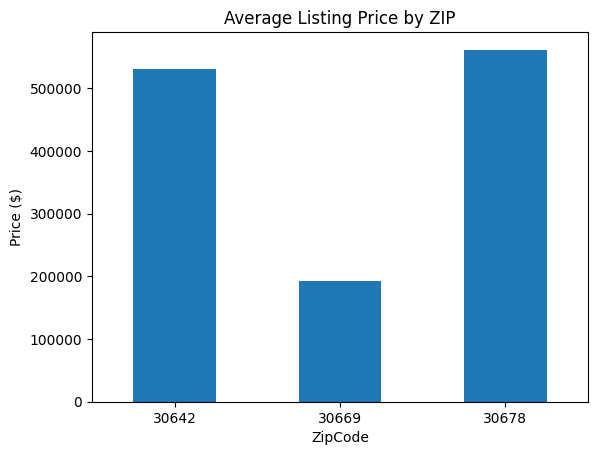

In [65]:
import matplotlib.pyplot as plt

# ZIP vs Avg Listing Price
Zip_Price.plot(x='ZipCode', y='ListingPrice', kind='bar', legend=False)
plt.title("Average Listing Price by ZIP")
plt.ylabel("Price ($)")
plt.xticks(rotation=0)
plt.show()

In [66]:
Zip_Per_SqFt = df.groupby('ZipCode')['Price Per SqFt'].mean().reset_index()
print(Zip_Per_SqFt)

   ZipCode  Price Per SqFt
0    30642      135.913908
1    30669       86.266850
2    30678      185.529074


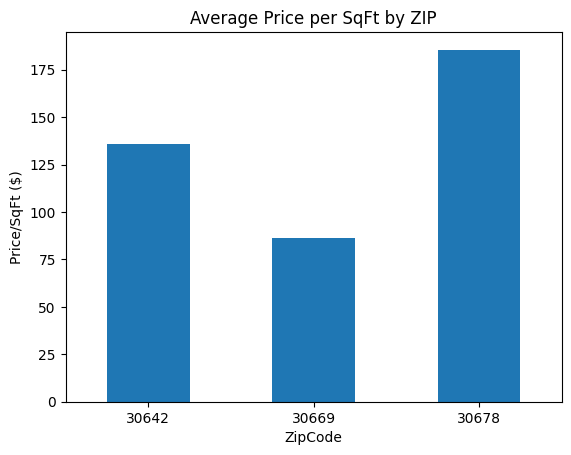

In [67]:
Zip_Per_SqFt.plot(x='ZipCode', y='Price Per SqFt', kind='bar', legend=False)
plt.title("Average Price per SqFt by ZIP")
plt.ylabel("Price/SqFt ($)")
plt.xticks(rotation=0)
plt.show()

In [68]:

df = df[~df["PropertyType"].isin(["Other", "Unknown"])].copy()

In [69]:
Property_Type_Price = df.groupby('PropertyType')['ListingPrice'].mean().reset_index()
print(Property_Type_Price)


  PropertyType   ListingPrice
0        Condo       325000.0
1        House  279813.793103
2         Land  131980.767857


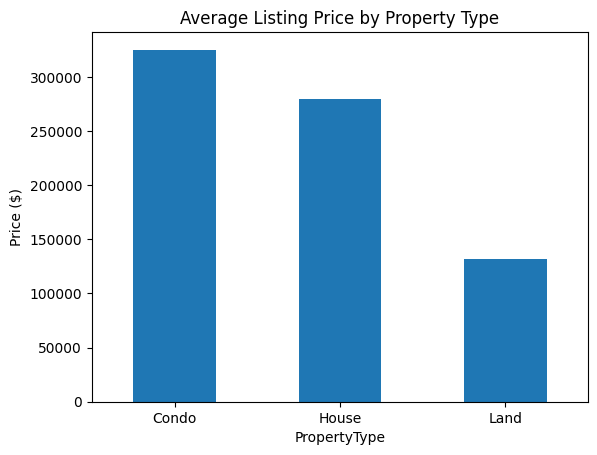

In [70]:
Property_Type_Price.plot(x='PropertyType', y='ListingPrice', kind='bar', legend=False)
plt.title("Average Listing Price by Property Type")
plt.ylabel("Price ($)")
plt.xticks(rotation=0)
plt.show()

In [71]:
import pandas as pd

# Load time series dataset
zhvi = pd.read_excel("Greene_County_Zillow_Time_Series.xlsx")

print(zhvi.head())
print(zhvi.info())


   RegionName     CountyName  2015-01-31 00:00:00  2015-02-28 00:00:00  \
0       30642  Greene County               362138               361130   
1       30669  Greene County                75574                75256   
2       30678  Greene County               266015               266554   

   2015-03-31 00:00:00  2015-04-30 00:00:00  2015-05-31 00:00:00  \
0               361022               362470               364125   
1                75021                75281                76062   
2               268186               270214               272502   

   2015-06-30 00:00:00  2015-07-31 00:00:00  2015-08-31 00:00:00  ...  \
0               365369               366968               368495  ...   
1                77001                78131                79096  ...   
2               274430               276806               278415  ...   

   2024-10-31 00:00:00  2024-11-30 00:00:00  2024-12-31 00:00:00  \
0               704012               706023               707544   
1

Melt the table to long format (one row per ZipCode per date)

In [72]:
# Drop the CountyName column first
zhvi_clean = zhvi.drop(columns=["CountyName"])

# Rename the first column to ZipCode
zhvi_clean.rename(columns={"RegionName": "ZipCode"}, inplace=True)

# Melt the dataframe
zhvi_long = zhvi_clean.melt(id_vars=["ZipCode"],
                            var_name="Date",
                            value_name="HomeValue")

# Convert Date to datetime
zhvi_long["Date"] = pd.to_datetime(zhvi_long["Date"], errors="coerce")

print(zhvi_long[zhvi_long["Date"].isna()])
print(zhvi_long.head())


Empty DataFrame
Columns: [ZipCode, Date, HomeValue]
Index: []
   ZipCode       Date  HomeValue
0    30642 2015-01-31     362138
1    30669 2015-01-31      75574
2    30678 2015-01-31     266015
3    30642 2015-02-28     361130
4    30669 2015-02-28      75256


Plot the time series

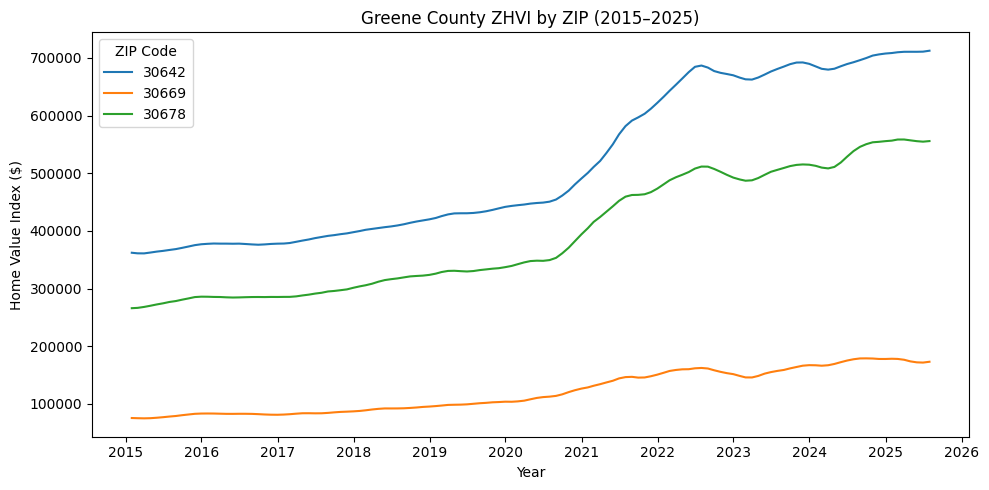

In [73]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10,5))
for z in sorted(zhvi_long['ZipCode'].unique()):
    subset = zhvi_long[zhvi_long['ZipCode'] == z]
    plt.plot(subset['Date'], subset['HomeValue'], label=z)

plt.title("Greene County ZHVI by ZIP (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Home Value Index ($)")

plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # one tick per year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend(title="ZIP Code")
plt.tight_layout()
plt.show()

Growth: Long-term growth (2015 → 2025)

To ensure appreciation for each ZIP over the full 10-year period.

In [74]:
Growth = zhvi_long.groupby('ZipCode').apply(
    lambda x: (x['HomeValue'].iloc[-1] - x['HomeValue'].iloc[0]) / x['HomeValue'].iloc[0] * 100
).reset_index(name="pct_growth")

print(Growth.sort_values("pct_growth", ascending=False))


   ZipCode  pct_growth
1    30669  129.090693
2    30678  108.921301
0    30642   96.731357


/tmp/ipython-input-3640699612.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Growth = zhvi_long.groupby('ZipCode').apply(


<Figure size 800x500 with 0 Axes>

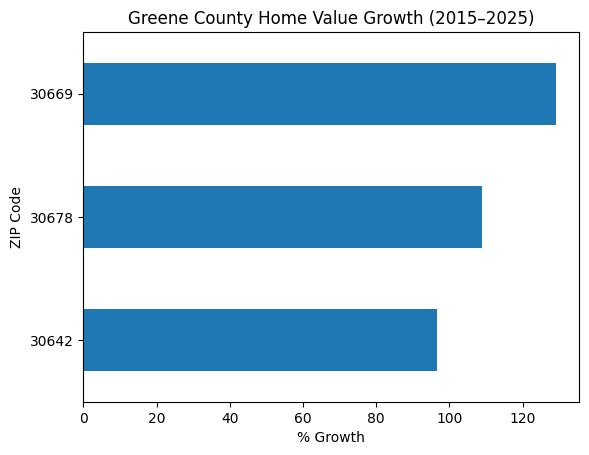

In [75]:
plt.figure(figsize=(8,5))
Growth.sort_values("pct_growth", ascending=True).plot(
    x="ZipCode", y="pct_growth", kind="barh", legend=False
)
plt.title("Greene County Home Value Growth (2015–2025)")
plt.xlabel("% Growth")
plt.ylabel("ZIP Code")
plt.show()

Recent Growth Trend (2020 → 2025)

In [76]:
Recent = zhvi_long[zhvi_long['Date'] >= "2020-01-01"]

Recent_Growth = Recent.groupby('ZipCode').apply(
    lambda x: (x['HomeValue'].iloc[-1] - x['HomeValue'].iloc[0]) / x['HomeValue'].iloc[0] * 100
).reset_index(name="pct_growth_recent")

print(Recent_Growth.sort_values("pct_growth_recent", ascending=False))


   ZipCode  pct_growth_recent
1    30669          66.843018
2    30678          63.795675
0    30642          60.691586


/tmp/ipython-input-2765214281.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Recent_Growth = Recent.groupby('ZipCode').apply(


<Figure size 800x500 with 0 Axes>

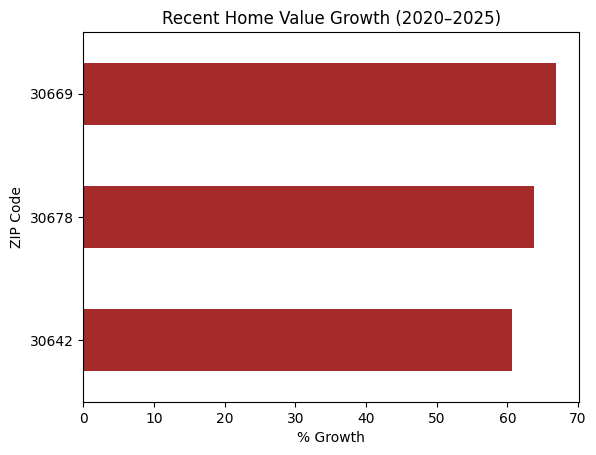

In [77]:
plt.figure(figsize=(8,5))
Recent_Growth.sort_values("pct_growth_recent", ascending=True).plot(
    x="ZipCode", y="pct_growth_recent", kind="barh", legend=False, color="Brown"
)
plt.title("Recent Home Value Growth (2020–2025)")
plt.xlabel("% Growth")
plt.ylabel("ZIP Code")
plt.show()

Pricing patterns (Relative positioning)

In [78]:
Latest = zhvi_long.groupby('ZipCode').apply(
    lambda x: x.loc[x['Date'].idxmax(), 'HomeValue']
).reset_index(name="Latest_Value")

print(Latest.sort_values("Latest_Value"))


   ZipCode  Latest_Value
1    30669        173133
2    30678        555762
0    30642        712439


/tmp/ipython-input-754709432.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Latest = zhvi_long.groupby('ZipCode').apply(


<Figure size 800x500 with 0 Axes>

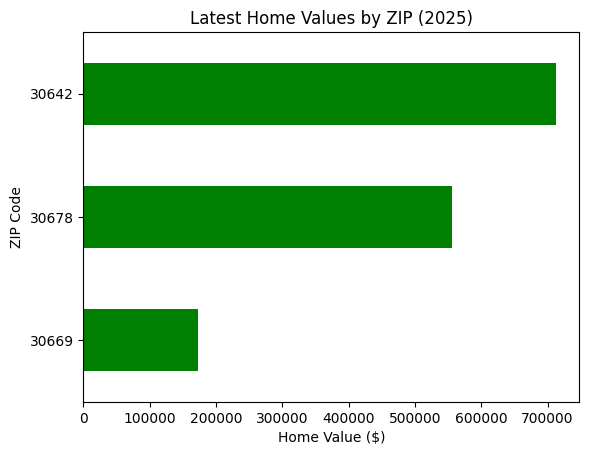

In [79]:
plt.figure(figsize=(8,5))
Latest.sort_values("Latest_Value", ascending=True).plot(
    x="ZipCode", y="Latest_Value", kind="barh", legend=False, color="green"
)
plt.title("Latest Home Values by ZIP (2025)")
plt.xlabel("Home Value ($)")
plt.ylabel("ZIP Code")
plt.show()


Market linearity (Trend stability)

In [80]:
from sklearn.linear_model import LinearRegression

def Trend_Strength(df):
    df = df.sort_values("Date")
    X = np.arange(len(df)).reshape(-1,1)
    y = df['HomeValue'].values
    model = LinearRegression().fit(X, y)
    r2 = model.score(X, y)
    return r2

Linearity = zhvi_long.groupby('ZipCode').apply(Trend_Strength).reset_index(name="Trend_r2")

def add_trend_comments(df, r2_col="Trend_r2"):
    def comment(r2):
        if r2 >= 0.90:
            return "Highly predictable growth"
        elif r2 >= 0.80:
            return "Moderately predictable growth"
        elif r2 >= 0.60:
            return "Predictable growth"
        else:
            return "Stable growth"
    df["Comment"] = df[r2_col].apply(comment)
    return df

Linearity = add_trend_comments(Linearity)

print(Linearity.sort_values("Trend_r2", ascending=False))


   ZipCode  Trend_r2                    Comment
1    30669  0.938629  Highly predictable growth
2    30678  0.932681  Highly predictable growth
0    30642  0.908448  Highly predictable growth


/tmp/ipython-input-56323934.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Linearity = zhvi_long.groupby('ZipCode').apply(Trend_Strength).reset_index(name="Trend_r2")


Spotting anomalies / undervalued areas

In [81]:
Analysis = Growth.merge(Recent_Growth, on="ZipCode") \
                 .merge(Latest, on="ZipCode") \
                 .merge(Linearity, on="ZipCode")

print(Analysis.sort_values("pct_growth_recent", ascending=False))


   ZipCode  pct_growth  pct_growth_recent  Latest_Value  Trend_r2  \
1    30669  129.090693          66.843018        173133  0.938629   
2    30678  108.921301          63.795675        555762  0.932681   
0    30642   96.731357          60.691586        712439  0.908448   

                     Comment  
1  Highly predictable growth  
2  Highly predictable growth  
0  Highly predictable growth  


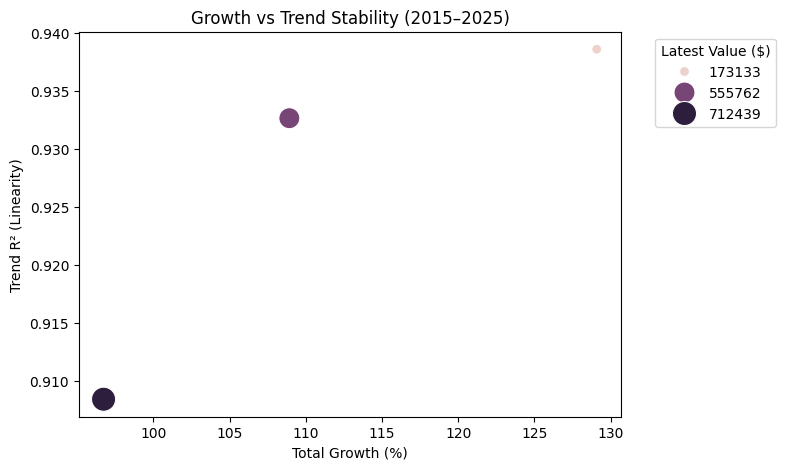

In [82]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(data=Analysis, x="pct_growth", y="Trend_r2", hue="Latest_Value", size="Latest_Value", sizes=(50,300))
plt.title("Growth vs Trend Stability (2015–2025)")
plt.xlabel("Total Growth (%)")
plt.ylabel("Trend R² (Linearity)")
plt.legend(title="Latest Value ($)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Undervalued ZIPs

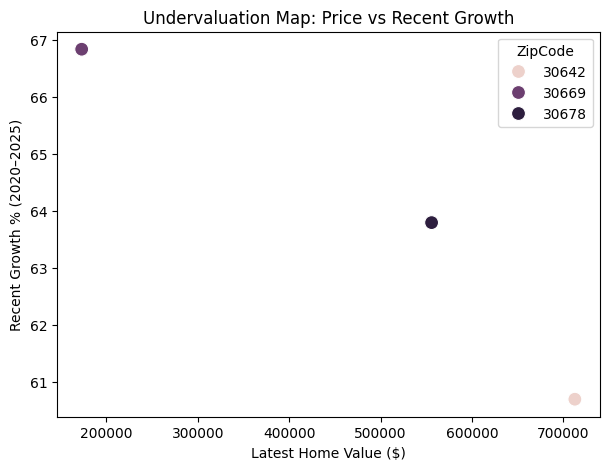

In [83]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=Analysis, x="Latest_Value", y="pct_growth_recent", hue="ZipCode", s=100)
plt.title("Undervaluation Map: Price vs Recent Growth")
plt.xlabel("Latest Home Value ($)")
plt.ylabel("Recent Growth % (2020–2025)")
plt.show()

Detect anomalies in Price per SqFt


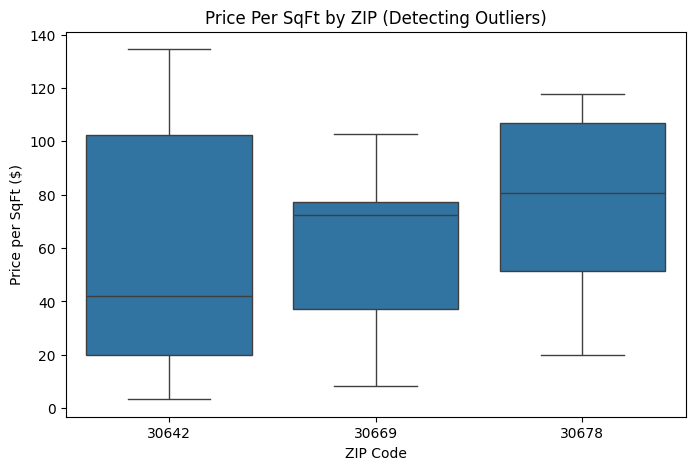

In [84]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="ZipCode", y="Price Per SqFt")
plt.title("Price Per SqFt by ZIP (Detecting Outliers)")
plt.xlabel("ZIP Code")
plt.ylabel("Price per SqFt ($)")
plt.show()


Undervalued & overpriced listings

In [85]:
def Flag_Anomalies(group):
    Q1 = group['Price Per SqFt'].quantile(0.25)
    Q3 = group['Price Per SqFt'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    group['Anomaly'] = group['Price Per SqFt'].apply(
        lambda x: "Undervalued" if x < lower else ("Overpriced" if x > upper else "Normal")
    )
    return group

df_anomalies = df.groupby("ZipCode").apply(Flag_Anomalies)

df_anomalies['Anomaly'].value_counts()


/tmp/ipython-input-3788566026.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_anomalies = df.groupby("ZipCode").apply(Flag_Anomalies)


,count
Anomaly,
Normal,86


Map undervaluation vs overpricing

/tmp/ipython-input-2332578970.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_anomalies = df.groupby("ZipCode").apply(Flag_Anomalies).reset_index(drop=True)


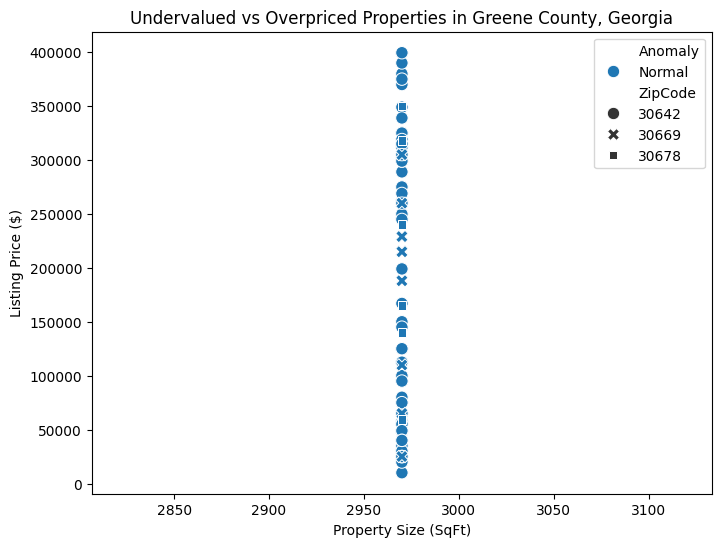

In [86]:
df_anomalies = df.groupby("ZipCode").apply(Flag_Anomalies).reset_index(drop=True)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_anomalies,
    x="Area(SqFt)",
    y="ListingPrice",
    hue="Anomaly",
    style="ZipCode",
    s=80
)
plt.title("Undervalued vs Overpriced Properties in Greene County, Georgia")
plt.xlabel("Property Size (SqFt)")
plt.ylabel("Listing Price ($)")
plt.show()


ZIP-level anomaly summary

In [87]:
Zip_Summary = df_anomalies.groupby("ZipCode")['Anomaly'].value_counts(normalize=True).unstack().fillna(0)

print(Zip_Summary)


Anomaly  Normal
ZipCode        
30642       1.0
30669       1.0
30678       1.0


In [88]:
import pandas as pd
import numpy as np

for col in ["Undervalued", "Overpriced", "Normal"]:
    if col not in Zip_Summary.columns:
        Zip_Summary[col] = 0

Zip_Summary.rename(columns={
    'Undervalued': 'Pct_Undervalued',
    'Overpriced': 'Pct_Overpriced',
    'Normal': 'Pct_Normal'
}, inplace=True)

zip_analysis = Analysis.merge(Zip_Summary, on="ZipCode", how="left")

Zip_Price = df.groupby("ZipCode")['ListingPrice'].mean().reset_index(name="Avg_ListingPrice")
Zip_Per_SqFt = df.groupby("ZipCode")['Price Per SqFt'].mean().reset_index(name="Avg_Price_Per_SqFt")

zip_analysis = zip_analysis.merge(Zip_Price, on="ZipCode") \
                           .merge(Zip_Per_SqFt, on="ZipCode")

zip_coords = {
    "30642": (33.523274, -83.202147),
    "30669": (33.634219, -83.091117),
    "30678": (33.452075, -83.075591)
}

zip_analysis['Latitude'] = zip_analysis['ZipCode'].map(lambda z: zip_coords[str(z)][0])
zip_analysis['Longitude'] = zip_analysis['ZipCode'].map(lambda z: zip_coords[str(z)][1])

zip_analysis = zip_analysis.loc[:, ~zip_analysis.columns.duplicated()]

cols = [
    'ZipCode', 'Latitude', 'Longitude',
    'pct_growth', 'pct_growth_recent', 'Latest_Value', 'Trend_r2', 'Comment',
    'Pct_Undervalued', 'Pct_Overpriced', 'Pct_Normal',
    'Avg_ListingPrice', 'Avg_Price_Per_SqFt'
]
zip_analysis = zip_analysis[cols]

zip_analysis.to_csv("LandCurator_GreeneCounty_Analysis.csv", index=False)

print(zip_analysis.head())


   ZipCode   Latitude  Longitude  pct_growth  pct_growth_recent  Latest_Value  \
0    30642  33.523274 -83.202147   96.731357          60.691586        712439   
1    30669  33.634219 -83.091117  129.090693          66.843018        173133   
2    30678  33.452075 -83.075591  108.921301          63.795675        555762   

   Trend_r2                    Comment  Pct_Undervalued  Pct_Overpriced  \
0  0.908448  Highly predictable growth                0               0   
1  0.938629  Highly predictable growth                0               0   
2  0.932681  Highly predictable growth                0               0   

   Pct_Normal  Avg_ListingPrice  Avg_Price_Per_SqFt  
0         1.0     180413.985714           60.745450  
1         1.0     179088.888889           60.299289  
2         1.0     227106.285714           76.466763  
